In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import files

In [5]:
uploaded_file_1 = files.upload()

Saving assessments.csv to assessments.csv


In [6]:
assessments = list(uploaded_file_1.keys())[0]
df = pd.read_csv(assessments)

In [10]:
# Tampilkan informasi dasar tentang data
print(df.info())

# Statistik deskriptif
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
None
       id_assessment        date      weight
count     206.000000  195.000000  206.000000
mean    26473.975728  145.005128   20.873786
std     10098.625521   76.001119   30.384224
min      1752.000000   12.000000    0.000000
25%     15023.250000   71.000000    0.000000
50%     25364.500000  152.000000   12.500000
75%     34891.750000  222.000000   24.250000
max     40088.000000  261.000000  100.000000


<ipython-input-19-8b6675931434>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


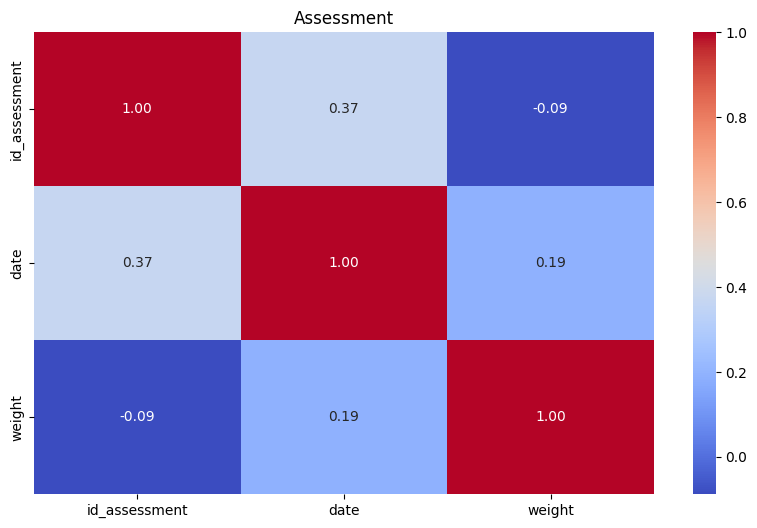

In [19]:
# Korelasi antara variabel numerik
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Assessment')
plt.show()

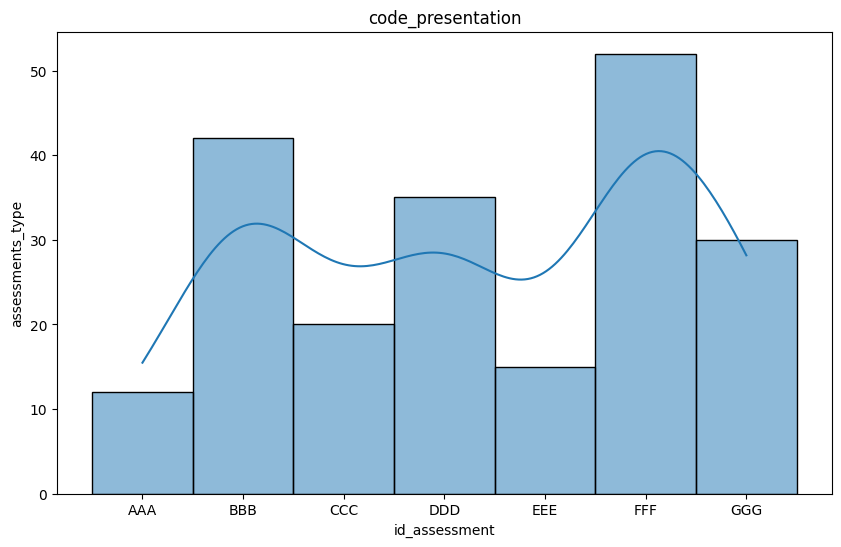

In [13]:
# Visualisasi distribusi data
plt.figure(figsize=(10, 6))
sns.histplot(df['code_module'], bins=20, kde=True)
plt.title('code_presentation')
plt.xlabel('id_assessment')
plt.ylabel('assessments_type')
plt.show()


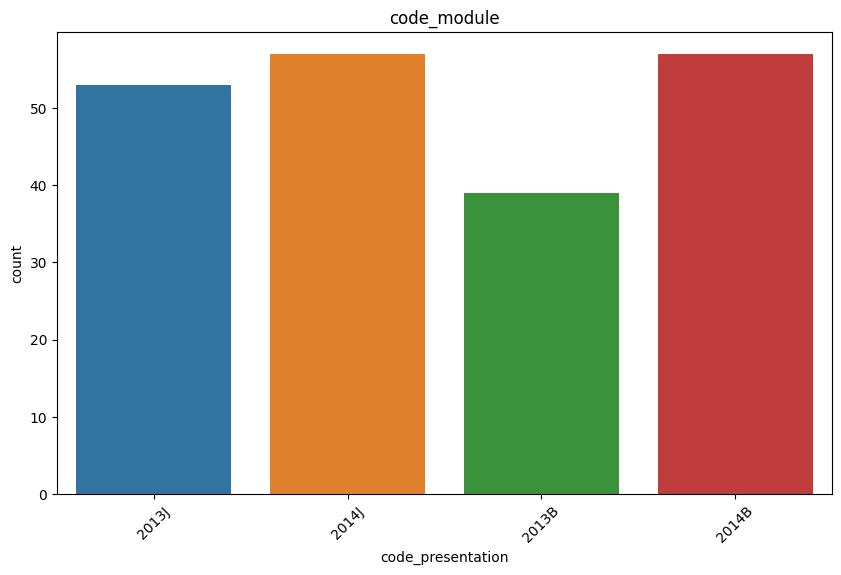

In [18]:
# Visualisasi data kategorikal
plt.figure(figsize=(10, 6))
sns.countplot(x='code_presentation', data=df)
plt.title('code_module')
plt.xticks(rotation=45)
plt.show()


Preprocessing

In [25]:
df['id_assessment'].fillna(df['id_assessment'].mean(), inplace=True)

In [26]:
df['id_assessment'].fillna(df['id_assessment'].mode()[0], inplace=True)


In [27]:
label_encoder = LabelEncoder()
df['id_assessment'] = label_encoder.fit_transform(df['id_assessment'])


In [28]:
scaler = StandardScaler()
df[['id_assessment', 'date']] = scaler.fit_transform(df[['id_assessment', 'date']])


In [29]:
X = df.drop('id_assessment', axis=1)  # Fitur
y = df['date']  # Target

In [31]:
# Menampilkan 5 baris pertama data setelah preprocessing
print(df.head())

# Menampilkan informasi dasar tentang data setelah preprocessing
print(df.info())

  code_module code_presentation  id_assessment assessment_type      date  \
0         AAA             2013J      -1.723663             TMA -1.662205   
1         AAA             2013J      -1.706847             TMA -1.200500   
2         AAA             2013J      -1.690031             TMA -0.369432   
3         AAA             2013J      -1.673214             TMA  0.276955   
4         AAA             2013J      -1.656398             TMA  0.923342   

   weight  
0    10.0  
1    20.0  
2    20.0  
3    20.0  
4    30.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    float64
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non